In [281]:
import pandas as pd
pd.options.display.max_rows = 10
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [282]:
data = pd.read_csv("data.csv")

In [283]:
def remove_non_digits(string):
    try:
        return re.sub(r'\D', '', string)
    except:
        pass

def remove_non_alpha(string):
    try:
        return re.sub(r'[^a-zA-Z]', '', string)
    except:
        pass

def year_format(year):
    year = int(year)
    if len(str(year)) == 2:
        if int(year) < 17:
            return '20'+str(year)
        else:
            return '19'+str(year)
    elif len(str(year)) == 1:
        if len(str(year)) == 1:
            if int(year) < 17:
                return '200'+str(year)
            else:
                return '109'+str(year)

    else:
        return str(year)
    
def convert_to_precentage(precentage):
    try:
        precentage = re.sub(r'[^\d.]', '', precentage)
        if float(precentage) > 1:
            precentage = precentage/100
        return float(precentage)

    except:
        return float(precentage)
    


In [284]:
today = datetime.datetime.now().strftime('%Y-%m-1')
today

'2023-05-1'

In [285]:
modee = data['earliest_cr_line'].mode()[0]
data['earliest_cr_line'].fillna(str(modee),inplace=True)
modee
data['earliest_cr_line_y'] = data['earliest_cr_line'].apply(remove_non_digits)
data['earliest_cr_line_y'] = data['earliest_cr_line_y'].apply(year_format)
data['earliest_cr_line_m'] = data['earliest_cr_line'].apply(remove_non_alpha)
data['earliest_cr_line'] = data['earliest_cr_line_m'] + "-"+data['earliest_cr_line_y']
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y').dt.date
date = pd.to_datetime(datetime.datetime.now().date())
data['mnths_since_earliest_cr_line'] = ((date - pd.to_datetime(data['earliest_cr_line'])) / pd.Timedelta(days=1) / 30).astype(int)
data.drop(['earliest_cr_line_y','earliest_cr_line_m','earliest_cr_line'],axis=1,inplace=True)

In [286]:
data_dummies = pd.concat([
    pd.get_dummies(data['grade'],prefix='grade',prefix_sep=':'),
    pd.get_dummies(data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
    pd.get_dummies(data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
    pd.get_dummies(data['verification_status'],prefix='verification_status',prefix_sep=':'),
    pd.get_dummies(data['loan_status'],prefix='loan_status',prefix_sep=':'),
    pd.get_dummies(data['purpose'],prefix='purpose',prefix_sep=':'),
    pd.get_dummies(data['addr_state'],prefix='addr_state',prefix_sep=':'),
    pd.get_dummies(data['initial_list_status'],prefix='initial_list_status',prefix_sep=':'),
    pd.get_dummies(data['term'],prefix='term',prefix_sep=':'),
],axis=1)


In [287]:
data = pd.concat([data,data_dummies],axis=1)

In [288]:
# data.drop(['grade','sub_grade','home_ownership','verification_status','purpose','addr_state','initial_list_status'],axis=1,inplace=True)

In [289]:
data.isnull().sum().sort_values(ascending=False)

orig_projected_additional_accrued_interest    264179
hardship_payoff_balance_amount                263947
hardship_status                               263947
deferral_term                                 263947
hardship_amount                               263947
                                               ...  
sub_grade:F4                                       0
sub_grade:F3                                       0
sub_grade:F2                                       0
sub_grade:F1                                       0
term: 60 months                                    0
Length: 277, dtype: int64

In [290]:
data.dropna(subset=['annual_inc','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','acc_now_delinq'],inplace=True)

In [291]:
data['emp_length'] = data['emp_length'].apply(remove_non_digits)
emp_length_med = data['emp_length'].median()
data['emp_length'].fillna(value=emp_length_med, inplace=True)
data['emp_length'] = data['emp_length'].astype(int)
data['term'] = data['term'].apply(remove_non_digits)

In [292]:
data['emp_length']

0          3
1          6
2          1
3         10
4          2
          ..
265050     1
265051    10
265052    10
265053     3
265054    10
Name: emp_length, Length: 265044, dtype: int32

In [293]:
data['issue_d_y'] = data['issue_d'].apply(remove_non_digits)
data['issue_d_y'] = data['issue_d_y'].apply(year_format)
data['issue_d_m'] = data['issue_d'].apply(remove_non_alpha)
data['issue_d'] = data['issue_d_m'] + "-"+data['issue_d_y']
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y').dt.date
data['mnths_since_issued_d'] = ((date - pd.to_datetime(data['issue_d'])) / pd.Timedelta(days=1) / 30).astype(int)
data.drop(['issue_d_m','issue_d_y','issue_d'],axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,term: 36 months,term: 60 months,mnths_since_issued_d
0,11000.0,11000.0,11000.0,36,9.58,352.78,B,B1,Sales manager,3,...,False,False,False,False,False,True,False,True,False,60
1,3350.0,3350.0,3350.0,36,18.25,121.54,E,E1,NaN,6,...,False,False,False,False,False,False,True,True,False,97
2,18400.0,18400.0,18400.0,60,12.74,416.22,C,C1,Picker,1,...,False,False,False,False,False,False,True,False,True,77
3,6000.0,6000.0,6000.0,36,10.99,196.41,B,B4,Sales,10,...,False,False,False,False,False,False,True,True,False,97
4,5000.0,5000.0,4975.0,36,8.19,157.13,A,A4,Warehouse Manager,2,...,False,False,False,False,False,True,False,True,False,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265050,12800.0,12800.0,12800.0,36,12.73,429.62,B,B5,Training Manager,1,...,False,False,False,False,False,False,True,True,False,58
265051,18000.0,18000.0,18000.0,60,9.17,375.14,B,B1,Customer Service,10,...,False,False,False,False,False,False,True,False,True,105
265052,28800.0,28800.0,28800.0,36,15.04,998.93,C,C4,DOCK CLERK WORKER,10,...,False,False,False,False,False,True,False,True,False,63
265053,10000.0,10000.0,10000.0,36,23.99,392.28,E,E2,Owner,3,...,False,False,False,False,False,False,True,True,False,79


In [294]:
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace = True)
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)

In [295]:
data['good_bad_status'] = np.where(data['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)
data['good_bad_status']

0         1
1         1
2         0
3         1
4         1
         ..
265050    1
265051    0
265052    0
265053    1
265054    1
Name: good_bad_status, Length: 265044, dtype: int32

In [296]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
def woe_continous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
def plot_woe(df_woe,rotation_x_axis=0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y=  df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by '+ df_woe.columns[0]))
    plt.xticks(rotation = rotation_x_axis)
def combine_dummies(df,column,dummies):
    pattern = re.compile(f"{column}|:")
    col_name = " "+'_'.join(dummies)
    col_name = re.sub(pattern, "", col_name)
    col_name = column + col_name
    df[col_name] = df[dummies].sum(axis=1)
    df.drop(dummies,axis=1,inplace=True)

In [297]:
data_inputs_train,data_inputs_test,data_targets_train,data_targets_test = train_test_split(data.drop('good_bad_status',axis=1),data['good_bad_status'],test_size=.2,random_state=29)

In [298]:
print(f'{data_inputs_train.shape}')
print(f'{data_inputs_test.shape}')
print(f'{data_targets_train.shape}')
print(f'{data_targets_test.shape}')

(212035, 280)
(53009, 280)
(212035,)
(53009,)


In [299]:
# df_inputs_prepr = data_inputs_train
# df_targets_prepr = data_targets_train
df_inputs_prepr = data_inputs_test
df_targets_prepr = data_targets_test

In [300]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,274,0.580292,0.005169,159.0,115.0,0.003394,0.018660,-1.704330,NaN,NaN,0.558568
1,F,808,0.629950,0.015243,509.0,299.0,0.010865,0.048515,-1.496298,0.049659,0.208032,0.558568
2,E,2897,0.711771,0.054651,2062.0,835.0,0.044017,0.135486,-1.124302,0.081820,0.371995,0.558568
3,D,7607,0.814513,0.143504,6196.0,1411.0,0.132263,0.228947,-0.548697,0.102742,0.575605,0.558568
4,C,14811,0.867598,0.279405,12850.0,1961.0,0.274303,0.318189,-0.148413,0.053085,0.400284,0.558568
5,B,15454,0.920862,0.291535,14231.0,1223.0,0.303783,0.198442,0.425814,0.053264,0.574227,0.558568
6,A,11158,0.971411,0.210493,10839.0,319.0,0.231375,0.051761,1.497413,0.050549,1.071599,0.558568


In [301]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,1,0.000000,0.000019,0.0,1.0,0.000000,0.000162,-inf,NaN,NaN,inf
1,OTHER,4,0.250000,0.000075,1.0,3.0,0.000021,0.000487,-3.126914,0.250000,inf,inf
2,RENT,20843,0.861392,0.393197,17954.0,2889.0,0.383256,0.468765,-0.201399,0.611392,2.925515,inf
3,OWN,5954,0.894525,0.112321,5326.0,628.0,0.113692,0.101898,0.109514,0.033132,0.310913,inf
4,MORTGAGE,26131,0.899047,0.492954,23493.0,2638.0,0.501494,0.428038,0.158379,0.004522,0.048866,inf
5,ANY,76,0.947368,0.001434,72.0,4.0,0.001537,0.000649,0.862070,0.048321,0.703690,inf


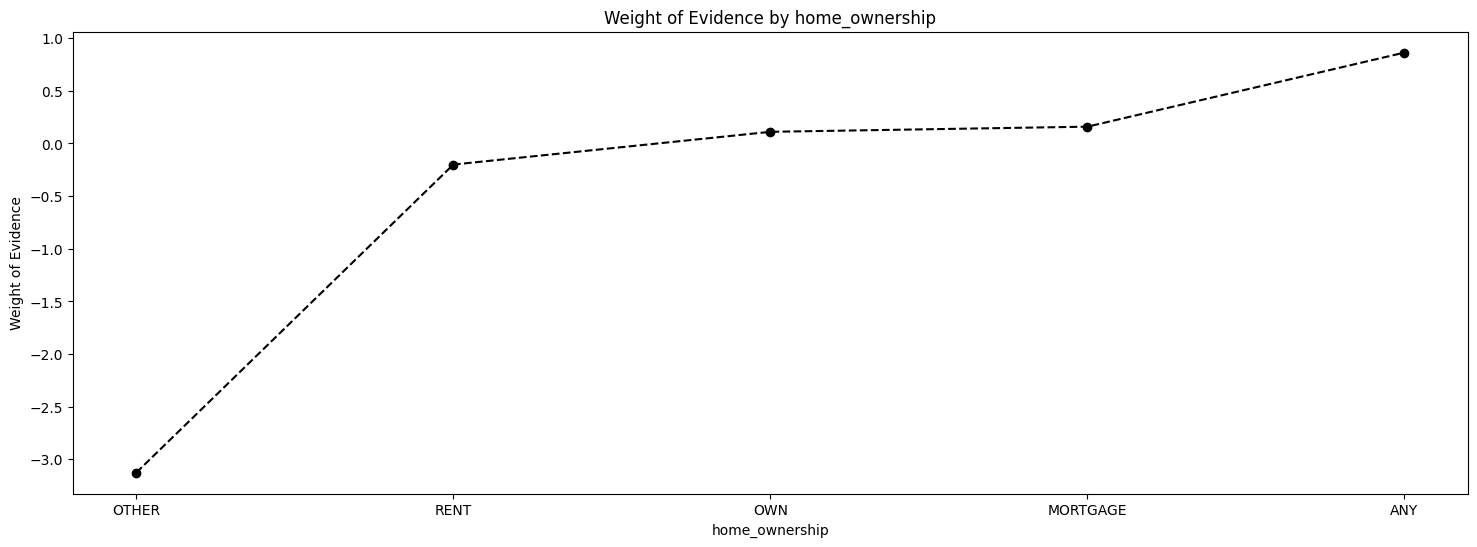

In [302]:
plot_woe(df_temp)

In [303]:
combine_dummies(df_inputs_prepr,'home_ownership',['home_ownership:OTHER','home_ownership:ANY','home_ownership:RENT','home_ownership:NONE'])

In [304]:
ref_cat = []
ref_cat.append("grade:G")
ref_cat.append("home_ownership OTHER_ANY_RENT_NONE")

In [305]:
df_inputs_prepr['addr_state'].unique()

array(['TX', 'NY', 'PA', 'AL', 'NC', 'NV', 'NM', 'NJ', 'TN', 'FL', 'VA',
       'CA', 'GA', 'MI', 'LA', 'OH', 'MO', 'MA', 'NE', 'SC', 'WA', 'IL',
       'MS', 'AZ', 'CT', 'IN', 'MD', 'WI', 'OR', 'ME', 'MN', 'KY', 'CO',
       'RI', 'ID', 'AK', 'DE', 'KS', 'MT', 'WY', 'UT', 'WV', 'HI', 'AR',
       'OK', 'SD', 'NH', 'DC', 'VT', 'ND', 'IA'], dtype=object)

In [306]:
df_temp = woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,AR,384,0.817708,0.007244,314.0,70.0,0.006703,0.011358,-0.527404,NaN,NaN,inf
1,DE,138,0.833333,0.002603,115.0,23.0,0.002455,0.003732,-0.418864,0.015625,0.108540,inf
2,AL,624,0.846154,0.011772,528.0,96.0,0.011271,0.015577,-0.323554,0.012821,0.095310,inf
3,AK,117,0.854701,0.002207,100.0,17.0,0.002135,0.002758,-0.256345,0.008547,0.067209,inf
4,FL,3734,0.867167,0.070441,3238.0,496.0,0.069120,0.080480,-0.152167,0.012466,0.104178,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
46,WV,223,0.923767,0.004207,206.0,17.0,0.004397,0.002758,0.466361,0.001956,0.027456,inf
47,ND,98,0.938776,0.001849,92.0,6.0,0.001964,0.000974,0.701727,0.015009,0.235366,inf
48,VT,115,0.939130,0.002169,108.0,7.0,0.002305,0.001136,0.707919,0.000355,0.006192,inf
49,ME,126,0.952381,0.002377,120.0,6.0,0.002562,0.000974,0.967430,0.013251,0.259511,inf


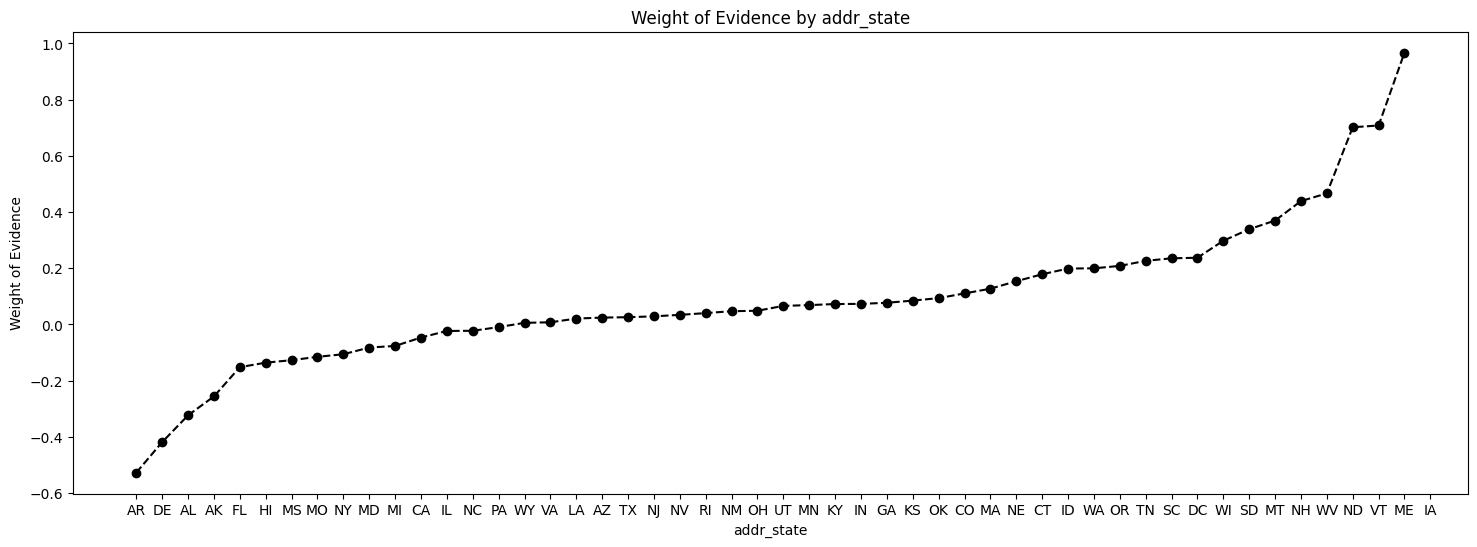

In [307]:
plot_woe(df_temp)

In [308]:
combine_dummies(df_inputs_prepr,'addr_state:',['addr_state:ND', 'addr_state:NE','addr_state:IA', 'addr_state:NV','addr_state:FL', 'addr_state:HI','addr_state:AL'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:NM', 'addr_state:VA'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:OK', 'addr_state:TN','addr_state:MO', 'addr_state:LA','addr_state:MD', 'addr_state:NC'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:UT', 'addr_state:KY','addr_state:AZ', 'addr_state:NJ'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:AR', 'addr_state:MI','addr_state:PA', 'addr_state:OH','addr_state:MN'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:RI', 'addr_state:MA','addr_state:DE', 'addr_state:SD','addr_state:IN'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:GA', 'addr_state:WA','addr_state:OR'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:WI','addr_state:MT'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:IL', 'addr_state:CT'])

combine_dummies(df_inputs_prepr,'addr_state',['addr_state:KS', 'addr_state:SC','addr_state:CO', 'addr_state:VT','addr_state:AK', 'addr_state:MS'])

combine_dummies(df_inputs_prepr,'addr_state:',['addr_state:WV', 'addr_state:NH','addr_state:WY', 'addr_state:DC','addr_state:ME', 'addr_state:ID'])

In [309]:
ref_cat.append("addr_state:ND_NE_IA_NV_FL_HI_AL")

In [310]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,13806,0.838114,0.260446,11571.0,2235.0,0.247001,0.362648,-0.384041,NaN,NaN,0.096347
1,Source Verified,20749,0.881585,0.391424,18292.0,2457.0,0.390471,0.398669,-0.020779,0.043471,0.363262,0.096347
2,Not Verified,18454,0.920288,0.348130,16983.0,1471.0,0.362528,0.238682,0.417968,0.038704,0.438748,0.096347


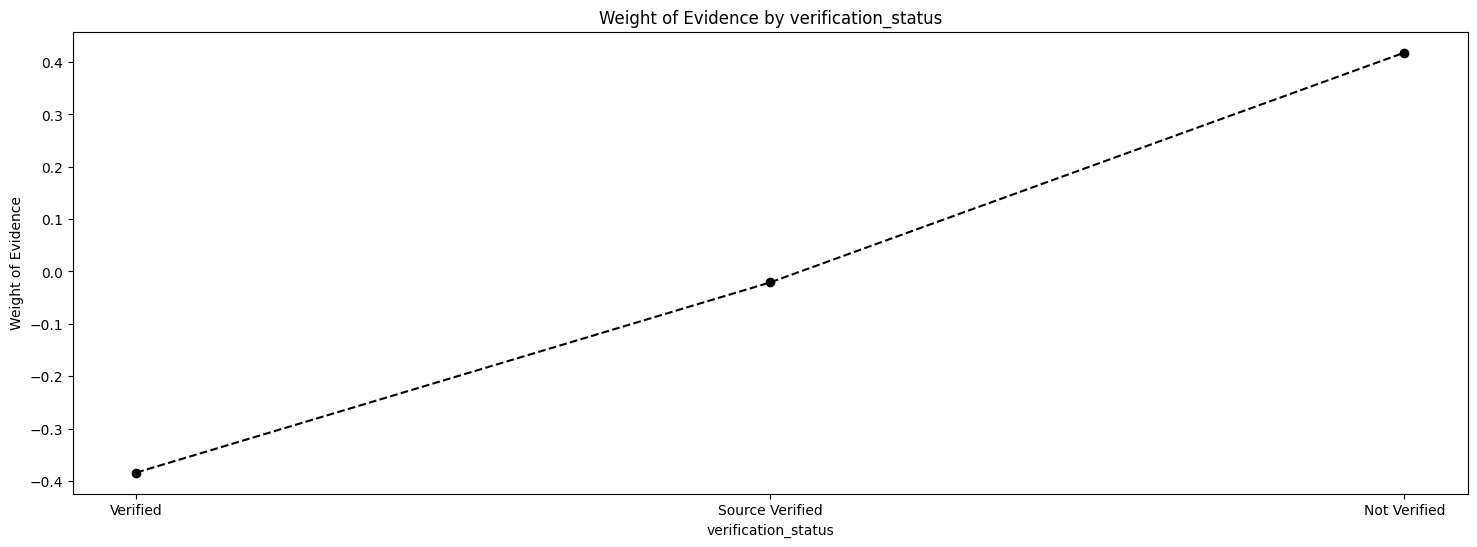

In [311]:
plot_woe(df_temp)

In [312]:
ref_cat.append('verification_status:Verified')

In [313]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,37,0.810811,0.000698,30.0,7.0,0.000640,0.001136,-0.573015,NaN,NaN,inf
1,small_business,507,0.830375,0.009564,421.0,86.0,0.008987,0.013954,-0.440016,0.019564,0.132998,inf
2,moving,306,0.833333,0.005773,255.0,51.0,0.005443,0.008275,-0.418864,0.002959,0.021152,inf
3,renewable_energy,27,0.851852,0.000509,23.0,4.0,0.000491,0.000649,-0.279102,0.018519,0.139762,inf
4,medical,647,0.854714,0.012205,553.0,94.0,0.011805,0.015252,-0.256239,0.002862,0.022863,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
9,credit_card,12537,0.908351,0.236507,11388.0,1149.0,0.243094,0.186435,0.265366,0.016275,0.181543,inf
10,vacation,366,0.912568,0.006904,334.0,32.0,0.007130,0.005192,0.317103,0.004217,0.051737,inf
11,car,505,0.916832,0.009527,463.0,42.0,0.009883,0.006815,0.371755,0.004263,0.054652,inf
12,house,346,0.924855,0.006527,320.0,26.0,0.006831,0.004219,0.481923,0.008024,0.110167,inf


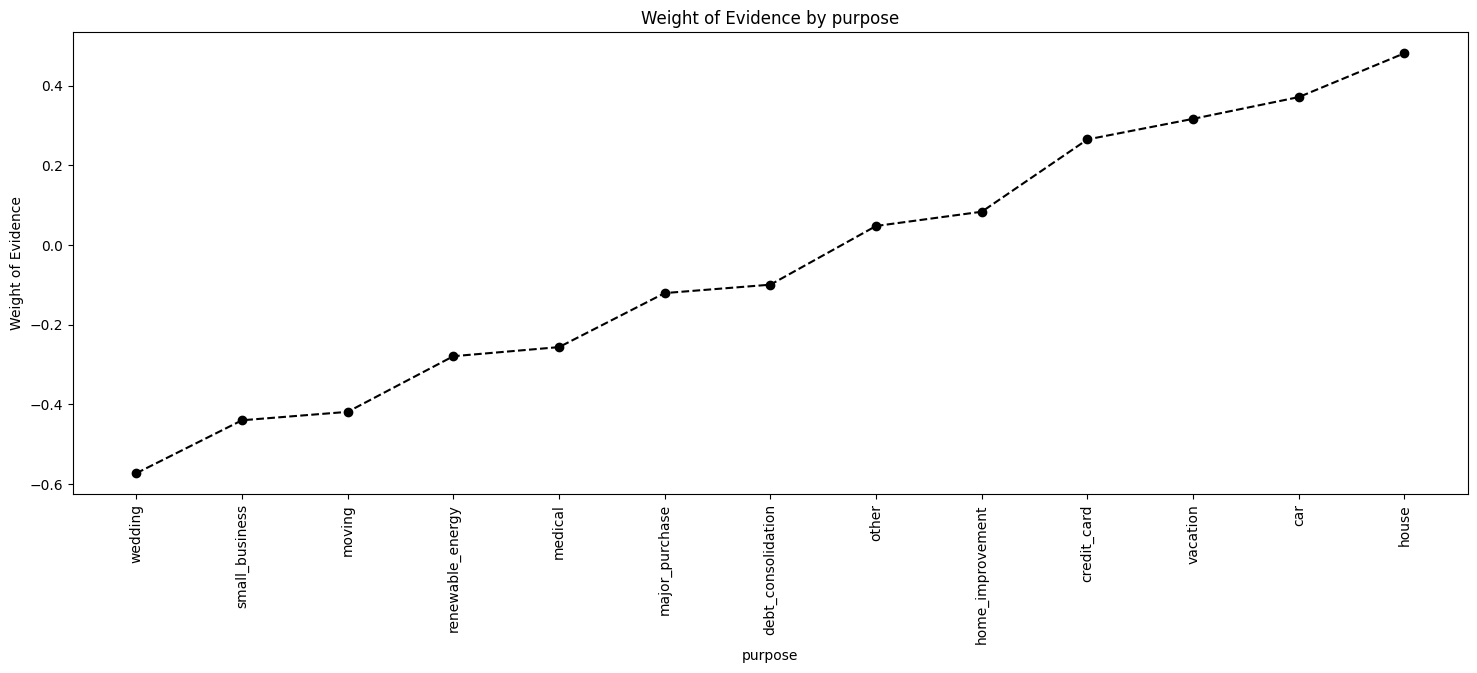

In [314]:
plot_woe(df_temp, 90)

In [315]:
combine_dummies(df_inputs_prepr,'purpose',['purpose:educational', 'purpose:small_business','purpose:wedding', 'purpose:renewable_energy','purpose:moving', 'purpose:house'])
combine_dummies(df_inputs_prepr,'purpose',['purpose:other', 'purpose:medical','purpose:vacation'])
combine_dummies(df_inputs_prepr,'purpose',['purpose:major_purchase', 'purpose:car','purpose:home_improvement'])

In [316]:
ref_cat.append('purpose educational_small_business_wedding_renewable_energy_moving_house')

In [317]:
df_inputs_prepr['term: 36 months'] = df_inputs_prepr['term: 36 months'].astype(int)
df_inputs_prepr['term: 60 months'] = df_inputs_prepr['term: 60 months'].astype(int)

In [318]:
df_temp = woe_continous(df_inputs_prepr,'emp_length',df_targets_prepr)
df_temp

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,8196,0.883114,0.154615,7238.0,958.0,0.154506,0.155444,-0.006050,NaN,NaN,0.005589
1,2,4730,0.885835,0.089230,4190.0,540.0,0.089442,0.087620,0.020585,0.002721,0.026634,0.005589
2,3,4210,0.885036,0.079420,3726.0,484.0,0.079537,0.078533,0.012704,0.000799,0.007881,0.005589
3,4,3151,0.888289,0.059443,2799.0,352.0,0.059749,0.057115,0.045084,0.003254,0.032381,0.005589
4,5,3316,0.877262,0.062555,2909.0,407.0,0.062097,0.066039,-0.061550,0.011028,0.106635,0.005589
5,6,6055,0.872337,0.114226,5282.0,773.0,0.112752,0.125426,-0.106521,0.004925,0.044970,0.005589
6,7,2183,0.878149,0.041182,1917.0,266.0,0.040921,0.043161,-0.053282,0.005812,0.053239,0.005589
7,8,2122,0.870877,0.040031,1848.0,274.0,0.039448,0.044459,-0.119571,0.007273,0.066289,0.005589
8,9,1802,0.865150,0.033994,1559.0,243.0,0.033279,0.039429,-0.169564,0.005727,0.049993,0.005589
9,10,17244,0.891788,0.325303,15378.0,1866.0,0.328267,0.302775,0.080839,0.026639,0.250402,0.005589


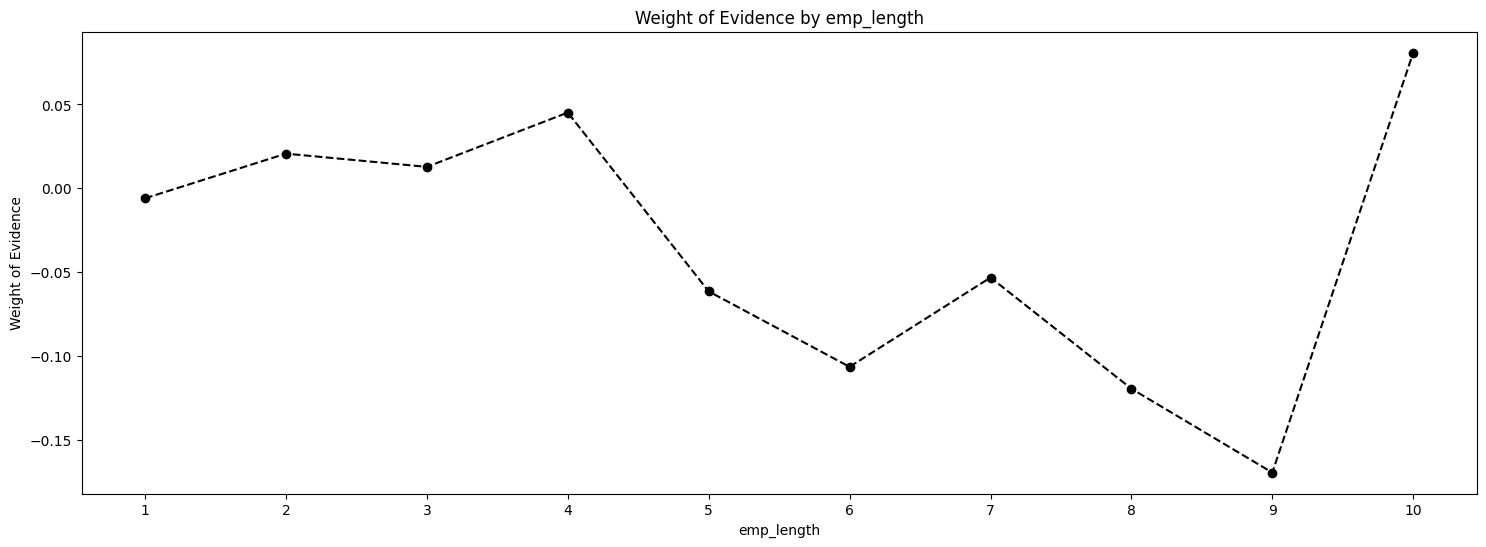

In [319]:
plot_woe(df_temp)

In [320]:
def create_dummy_column(col_name, new_col_name, value=[], df=df_inputs_prepr, typee=None):
    if typee == 'range':
        df[new_col_name] = np.where((df[col_name] > value[0]) & (df[col_name] <= value[1]), 1, 0)
    elif typee == 'bigger':
        df[new_col_name] = np.where(df[col_name] >= value[0], 1, 0)
    elif typee == 'smaller':
        df[new_col_name] = np.where(df[col_name] <= value[0], 1, 0)
    elif typee == 'null':
        value = []
        df[new_col_name] = np.where(df[col_name].isnull(), 1, 0)
    else:
        df[new_col_name] = np.where(df[col_name].isin(value), 1, 0)


In [321]:
create_dummy_column('emp_length',"emp_length:1-2",[1,2])
create_dummy_column('emp_length',"emp_length:3",[3])
create_dummy_column('emp_length',"emp_length:4",[4])
create_dummy_column('emp_length',"emp_length:5-7-9",[5,7,9])
create_dummy_column('emp_length',"emp_length:6",[6]) 
create_dummy_column('emp_length',"emp_length:8",[8]) 
create_dummy_column('emp_length',"emp_length:10+",[10])

In [322]:
ref_cat.append('emp_length:8')

In [323]:
df_inputs_prepr_filtered = df_inputs_prepr.loc[df_inputs_prepr['mnths_since_issued_d'] <= 1245.66, ['mnths_since_issued_d']]
df_inputs_prepr['mnths_since_issued_d_factor'] = pd.cut(df_inputs_prepr_filtered['mnths_since_issued_d'], 50)


In [324]:
df_inputs_prepr['mnths_since_issued_d_factor'].nunique()

50

In [325]:
df_temp = woe_continous(df_inputs_prepr,'mnths_since_issued_d_factor',df_targets_prepr)
df_temp

,mnths_since_issued_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(53.861, 56.78]",2509,0.989239,0.055749,2482.0,27.0,0.063473,0.004575,2.630075,NaN,NaN,inf
1,"(56.78, 59.56]",2542,0.975216,0.056483,2479.0,63.0,0.063397,0.010674,1.781568,0.014022,0.848507,inf
2,"(59.56, 62.34]",2697,0.951798,0.059927,2567.0,130.0,0.065647,0.022026,1.092051,0.023418,0.689517,inf
3,"(62.34, 65.12]",2088,0.942050,0.046395,1967.0,121.0,0.050303,0.020502,0.897566,0.009748,0.194484,inf
4,"(65.12, 67.9]",1606,0.930262,0.035685,1494.0,112.0,0.038207,0.018977,0.699806,0.011788,0.197761,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(179.1, 181.88]",3,0.666667,0.000067,2.0,1.0,0.000051,0.000169,-1.197761,0.333333,inf,inf
46,"(181.88, 184.66]",17,0.823529,0.000378,14.0,3.0,0.000358,0.000508,-0.350463,0.156863,0.847298,inf
47,"(184.66, 187.44]",19,0.736842,0.000422,14.0,5.0,0.000358,0.000847,-0.861288,0.086687,0.510826,inf
48,"(187.44, 190.22]",2,1.000000,0.000044,2.0,0.0,0.000051,0.000000,inf,0.263158,inf,inf


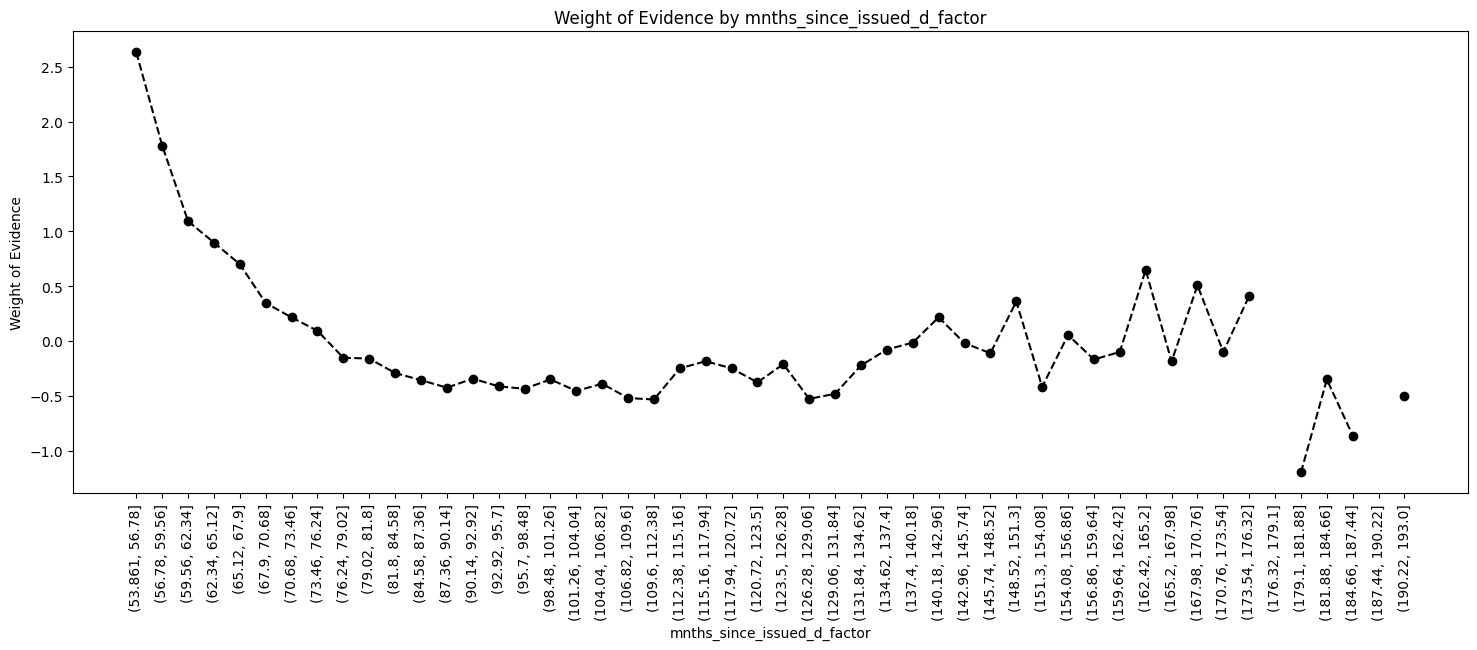

In [326]:
plot_woe(df_temp,90)

In [327]:
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d < 58',[55.78],typee='smaller')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d 55.78 - 58.56',[55.78,58.56],typee='range')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d  58.56 - 61.34',[58.56,61.34],typee='range')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d  61.34 - 64.12',[61.34,64.12],typee='range')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d  64.12 - 66.9',[64.12,66.9],typee='range')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d  66.9 - 69.67',[66.9,69.67],typee='range')
create_dummy_column('mnths_since_issued_d','mnths_since_issued_d > 69',[69.67],typee='bigger')

In [328]:
ref_cat.append('mnths_since_issued_d > 69')

In [329]:
ref_cat

['grade:G',
 'home_ownership OTHER_ANY_RENT_NONE',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose educational_small_business_wedding_renewable_energy_moving_house',
 'emp_length:8',
 'mnths_since_issued_d > 69']

In [330]:
df_inputs_prepr['term: 60 months']

119536    0
226724    1
84871     0
134254    1
124153    0
         ..
20942     1
19078     0
26448     1
89572     1
118959    0
Name: term: 60 months, Length: 53009, dtype: int32

In [331]:
df_inputs_prepr['int_rate'] = df_inputs_prepr['int_rate'].apply(convert_to_precentage)

In [332]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)

In [333]:
df_temp = woe_continous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp.sort_values('n_obs',ascending=False)

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
5,"(7.878, 8.392]",3506,0.953508,0.066140,3343.0,163.0,0.071361,0.026448,0.992572,0.012999,0.341484,0.516162
14,"(12.5, 13.014]",2743,0.871673,0.051746,2391.0,352.0,0.051040,0.057115,-0.112466,0.015472,0.146069,0.516162
16,"(13.528, 14.041]",2738,0.860117,0.051652,2355.0,383.0,0.050271,0.062145,-0.212041,0.008860,0.075680,0.516162
11,"(10.96, 11.473]",2711,0.899668,0.051142,2439.0,272.0,0.052064,0.044134,0.165239,0.026008,0.328544,0.516162
13,"(11.987, 12.5]",2676,0.887145,0.050482,2374.0,302.0,0.050677,0.049002,0.033603,0.023695,0.262030,0.516162
...,...,...,...,...,...,...,...,...,...,...,...,...
47,"(29.449, 29.963]",41,0.731707,0.000773,30.0,11.0,0.000640,0.001785,-1.025000,0.131707,0.597837,0.516162
48,"(29.963, 30.476]",41,0.658537,0.000773,27.0,14.0,0.000576,0.002272,-1.371522,0.073171,0.346523,0.516162
44,"(27.908, 28.422]",24,0.416667,0.000453,10.0,14.0,0.000213,0.002272,-2.364774,0.267544,1.109662,0.516162
43,"(27.395, 27.908]",19,0.684211,0.000358,13.0,6.0,0.000278,0.000974,-1.255112,0.041980,0.202190,0.516162


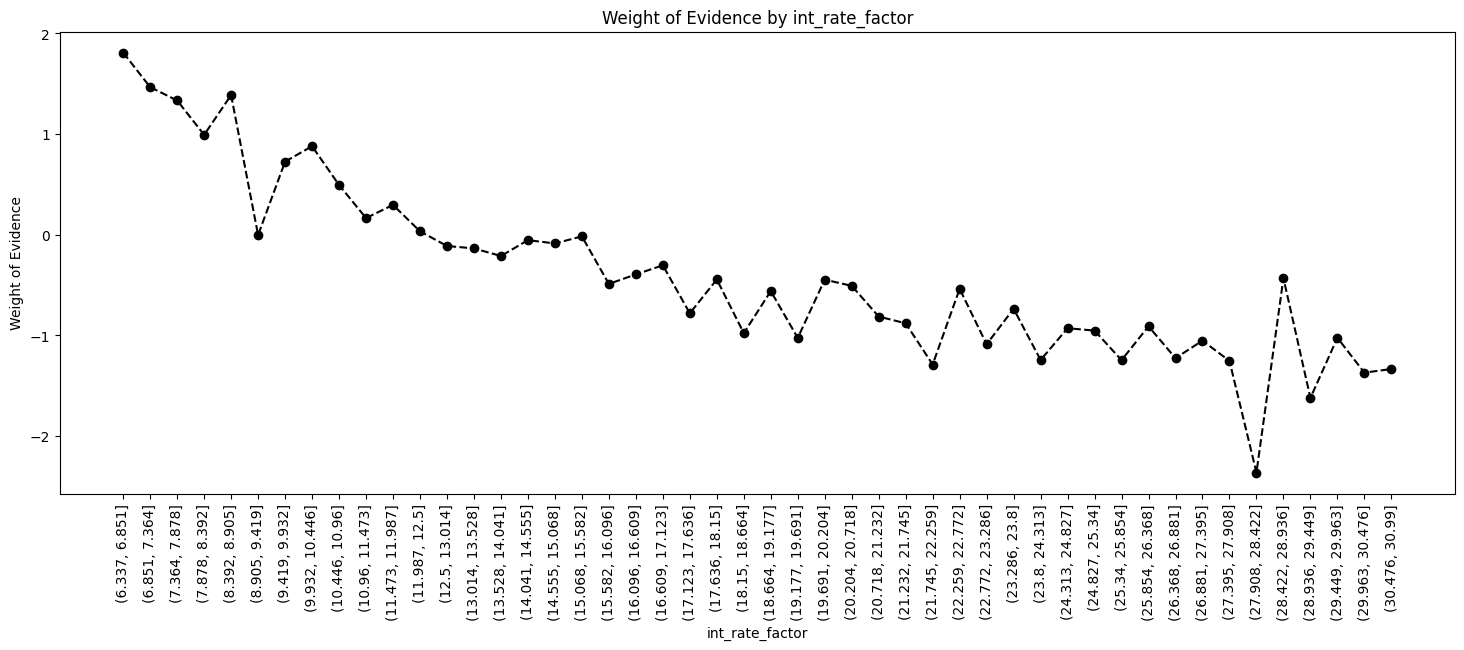

In [334]:
plot_woe(df_temp.iloc[2:],90)

In [335]:
create_dummy_column('int_rate',"int_rate < 6.851",[6.851],typee='smaller')
create_dummy_column('int_rate',"int_rate 6.851-7.878",[6.851,7.878],typee='range')
create_dummy_column('int_rate',"int_rate 7.878-8.392",[7.878,8.392],typee='range')
create_dummy_column('int_rate',"int_rate 7.878-15.582",[8.392,15.582],typee='range')
create_dummy_column('int_rate',"int_rate 15.582 - 19.691",[15.582,19.691],typee='range')
create_dummy_column('int_rate',"int_rate > 19.691",[19.691],typee='bigger')

In [336]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'], 50)
df_temp = woe_continous(df_inputs_prepr, 'mnths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(81.152, 98.96]",175,0.971429,0.003301,170.0,5.0,0.003629,0.000811,1.498059,NaN,NaN,inf
1,"(98.96, 115.92]",707,0.949081,0.013337,671.0,36.0,0.014324,0.005841,0.896948,0.022348,0.601110,inf
2,"(115.92, 132.88]",1016,0.912402,0.019167,927.0,89.0,0.019788,0.014441,0.315015,0.036679,0.581933,inf
3,"(132.88, 149.84]",1324,0.895015,0.024977,1185.0,139.0,0.025296,0.022554,0.114722,0.017386,0.200293,inf
4,"(149.84, 166.8]",1463,0.904990,0.027599,1324.0,139.0,0.028263,0.022554,0.225637,0.009975,0.110915,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(845.2, 862.16]",1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,1.000000,inf,inf
46,"(862.16, 879.12]",1,0.000000,0.000019,0.0,1.0,0.000000,0.000162,-inf,1.000000,inf,inf
47,"(879.12, 896.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
48,"(896.08, 913.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


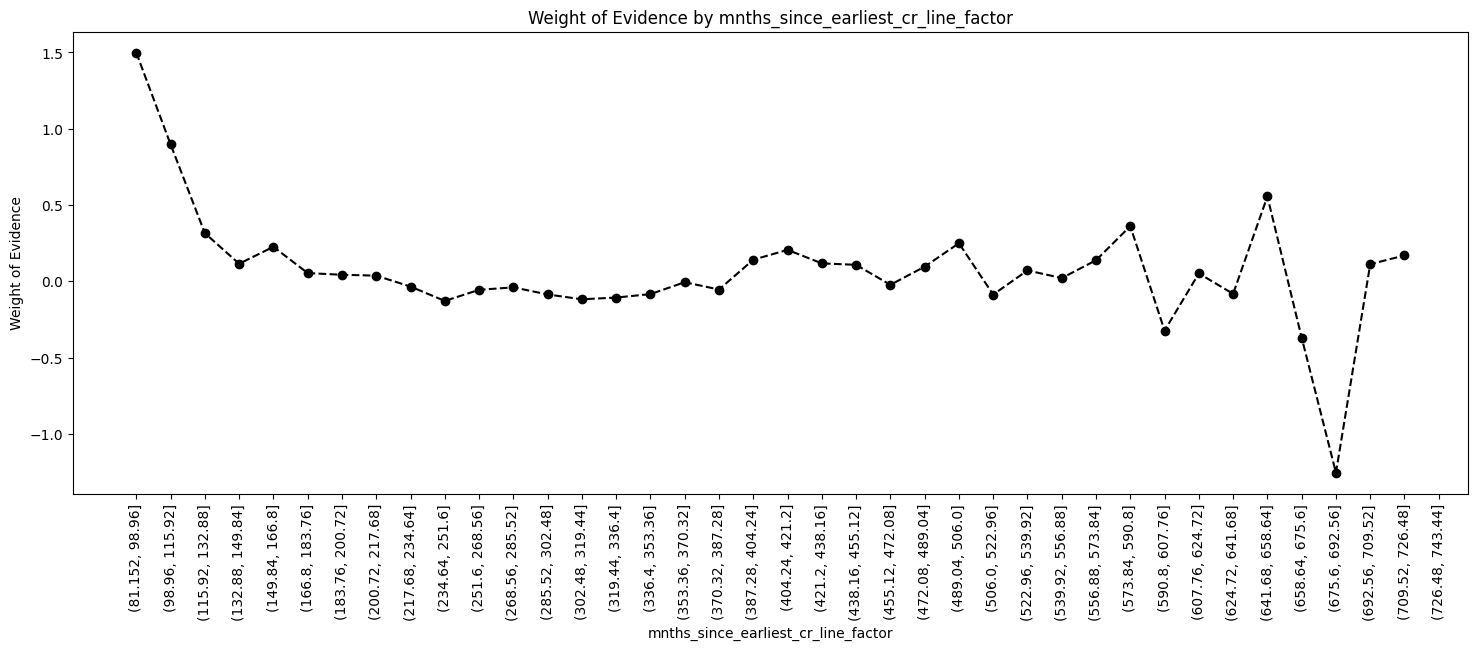

In [337]:
plot_woe(df_temp,90)

In [338]:
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line < 99',[99],typee='smaller')
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line 99-117',[99,117],typee='range')
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line 117-170',[117,170],typee='range')
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line 170-400',[170,400],typee='range')
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line 400-488',[400,488],typee='range')
create_dummy_column("mnths_since_earliest_cr_line",'mnths_since_earliest_cr_line > 488',[488],typee='bigger')

In [339]:
ref_cat.append('mnths_since_earliest_cr_line > 488')

In [340]:
df_temp = woe_continous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,43542,0.886822,0.821408,38614.0,4928.0,0.824275,0.799611,0.030380,NaN,NaN,inf
1,1.0,6330,0.871090,0.119414,5514.0,816.0,0.117705,0.132403,-0.117671,0.015732,0.148050,inf
2,2.0,1794,0.856745,0.033843,1537.0,257.0,0.032810,0.041700,-0.239790,0.014345,0.122120,inf
3,3.0,659,0.867982,0.012432,572.0,87.0,0.012210,0.014117,-0.145071,0.011237,0.094719,inf
4,4.0,314,0.898089,0.005924,282.0,32.0,0.006020,0.005192,0.147869,0.030107,0.292940,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
14,16.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
15,18.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
16,20.0,1,0.000000,0.000019,0.0,1.0,0.000000,0.000162,-inf,1.000000,inf,inf
17,21.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,1.000000,inf,inf


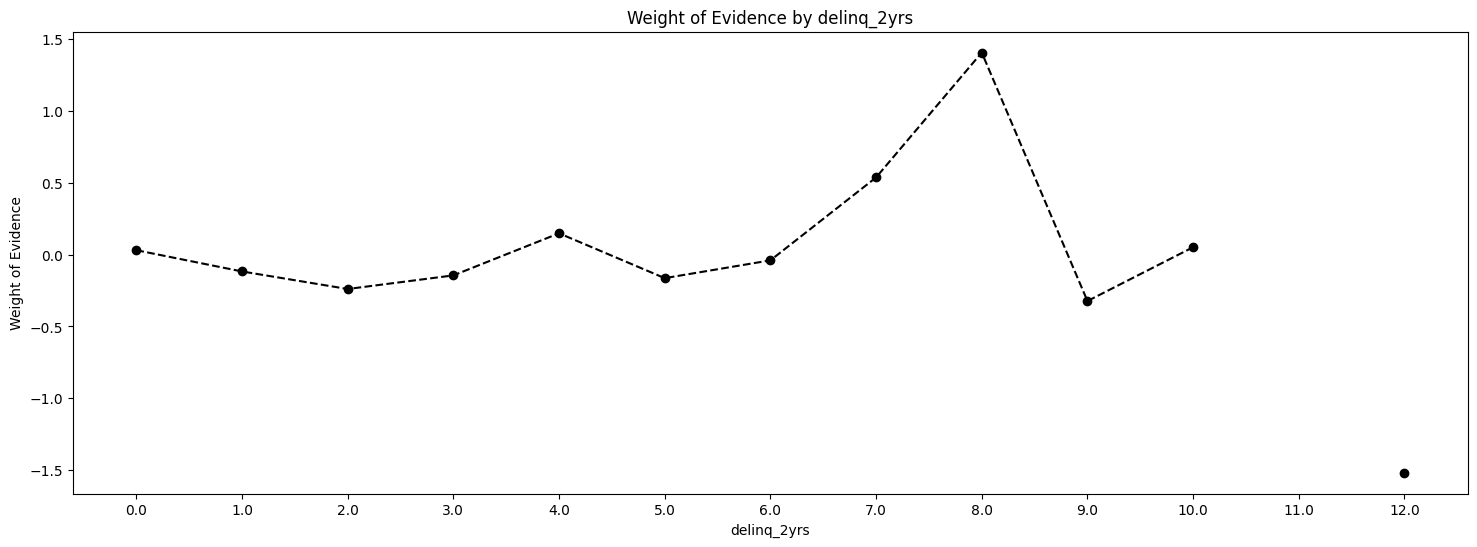

In [341]:
plot_woe(df_temp)

In [342]:
create_dummy_column("delinq_2yrs",'delinq_2yrs:0',[0])
create_dummy_column("delinq_2yrs",'delinq_2yrs:1-3',[1,3],typee='range')
create_dummy_column("delinq_2yrs",'delinq_2yrs:>=4',[3],typee='bigger')

In [343]:
ref_cat.append('delinq_2yrs:>=4')

In [344]:
df_temp = woe_continous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,32824,0.901992,0.619216,29607.0,3217.0,0.632007,0.521986,0.191260,NaN,NaN,inf
1,1.0,13665,0.870692,0.257786,11898.0,1767.0,0.253981,0.286711,-0.121215,0.031301,0.312474,inf
2,2.0,4477,0.831360,0.084457,3722.0,755.0,0.079452,0.122505,-0.433003,0.039331,0.311788,inf
3,3.0,1478,0.792287,0.027882,1171.0,307.0,0.024997,0.049813,-0.689536,0.039073,0.256533,inf
4,4.0,391,0.795396,0.007376,311.0,80.0,0.006639,0.012981,-0.670536,0.003110,0.019001,inf
5,5.0,147,0.802721,0.002773,118.0,29.0,0.002519,0.004706,-0.624913,0.007325,0.045623,inf
6,6.0,22,0.681818,0.000415,15.0,7.0,0.000320,0.001136,-1.266162,0.120903,0.641249,inf
7,7.0,4,1.000000,0.000075,4.0,0.0,0.000085,0.000000,inf,0.318182,inf,inf
8,12.0,1,0.000000,0.000019,0.0,1.0,0.000000,0.000162,-inf,1.000000,inf,inf


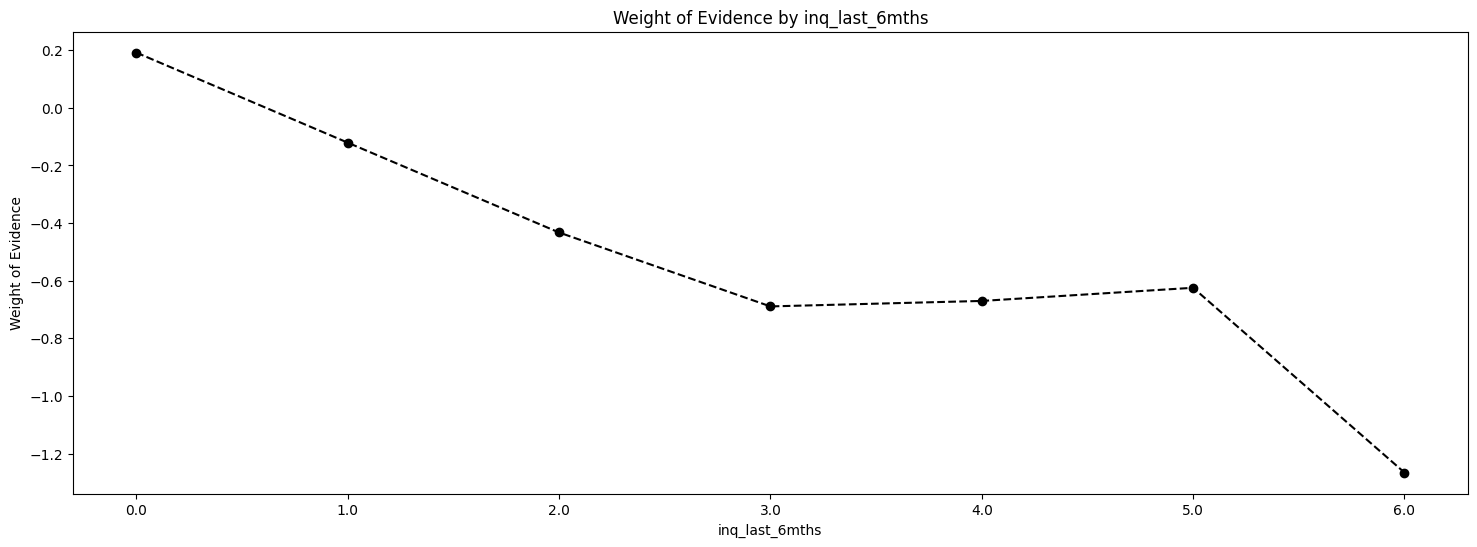

In [345]:
plot_woe(df_temp)

In [346]:
create_dummy_column('inq_last_6mths','inq_last_6mths:0',[0])
create_dummy_column('inq_last_6mths','inq_last_6mths:1-2',[1,2])
create_dummy_column('inq_last_6mths','inq_last_6mths:3-6',[3,6],typee='range' )
create_dummy_column('inq_last_6mths','inq_last_6mths:>6', [6],typee='bigger')

In [347]:
ref_cat.append('inq_last_6mths:>6')

In [348]:
df_temp = woe_continous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,NaN,NaN,inf
1,1.0,46,0.956522,0.000868,44.0,2.0,0.000939,0.000325,1.062740,0.043478,inf,inf
2,2.0,270,0.900000,0.005093,243.0,27.0,0.005187,0.004381,0.168923,0.056522,0.893818,inf
3,3.0,792,0.919192,0.014941,728.0,64.0,0.015540,0.010385,0.403116,0.019192,0.234193,inf
4,4.0,1657,0.899819,0.031259,1491.0,166.0,0.031828,0.026935,0.166913,0.019373,0.236203,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
52,52.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
53,53.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
54,56.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
55,57.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf


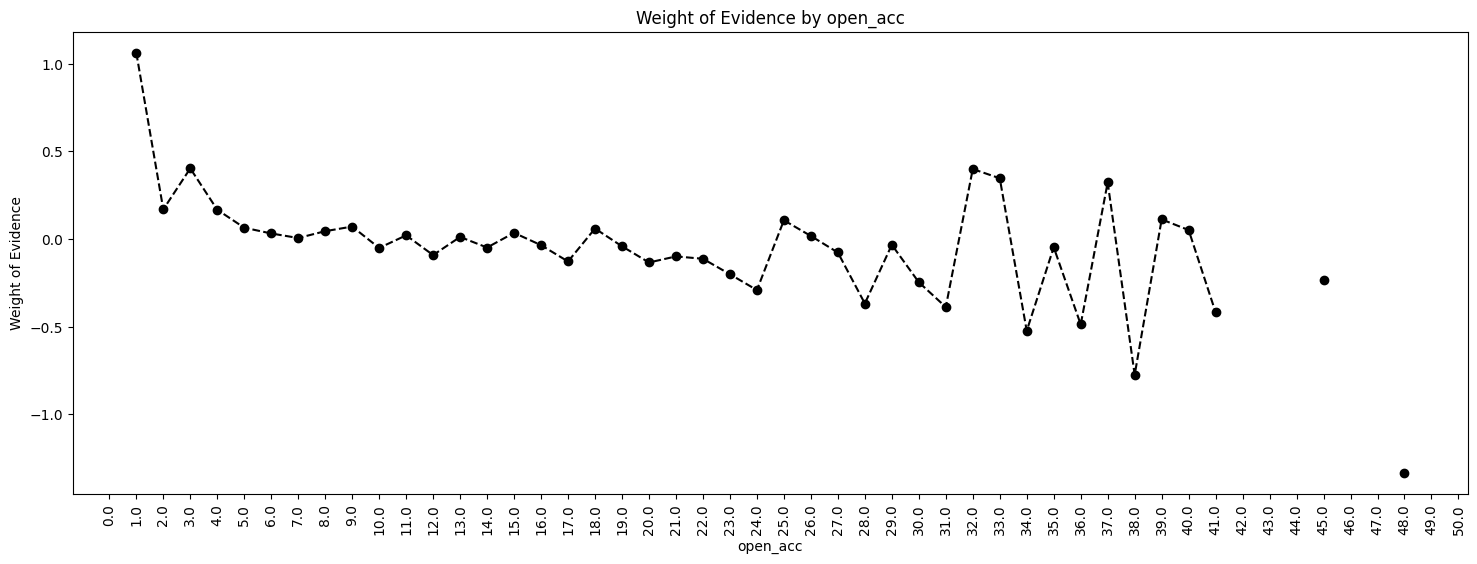

In [349]:
plot_woe(df_temp, 90)

In [350]:
create_dummy_column('open_acc','open_acc:0',[0])
create_dummy_column('open_acc','open_acc:1-3',[1,3],typee='range')
create_dummy_column('open_acc','open_acc:4-12',[4,12],typee='range')
create_dummy_column('open_acc','open_acc:13-17',[13,17],typee='range')
create_dummy_column('open_acc','open_acc:18-22',[18,22],typee='range')
create_dummy_column('open_acc','open_acc:23-25',[23,25],typee='range')
create_dummy_column('open_acc','open_acc:26-30',[26,30],typee='range')
create_dummy_column('open_acc','open_acc:>=31',[31],typee='bigger')

In [351]:
ref_cat.append('open_acc:>=31')

In [352]:
df_temp = woe_continous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,44879,0.889503,0.846630,39920.0,4959.0,0.852154,0.804641,0.057371,NaN,NaN,inf
1,1.0,7048,0.856555,0.132959,6037.0,1011.0,0.128869,0.164043,-0.241335,0.032948,0.298706,inf
2,2.0,688,0.819767,0.012979,564.0,124.0,0.012039,0.020120,-0.513529,0.036788,0.272195,inf
3,3.0,227,0.837004,0.004282,190.0,37.0,0.004056,0.006004,-0.392196,0.017237,0.121333,inf
4,4.0,83,0.819277,0.001566,68.0,15.0,0.001452,0.002434,-0.516844,0.017727,0.124649,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
8,8.0,5,0.800000,0.000094,4.0,1.0,0.000085,0.000162,-0.642008,0.088889,0.693147,inf
9,9.0,5,0.600000,0.000094,3.0,2.0,0.000064,0.000325,-1.622837,0.200000,0.980829,inf
10,19.0,1,0.000000,0.000019,0.0,1.0,0.000000,0.000162,-inf,0.600000,inf,inf
11,23.0,1,1.000000,0.000019,1.0,0.0,0.000021,0.000000,inf,1.000000,inf,inf


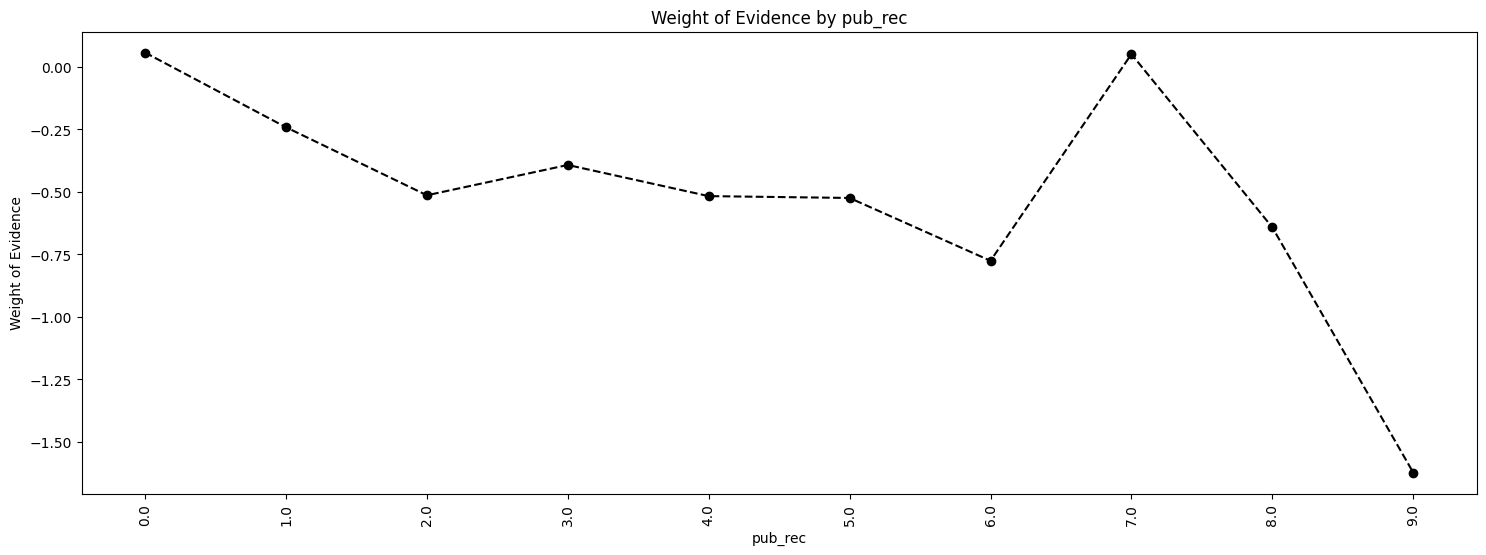

In [353]:
plot_woe(df_temp, 90)

In [354]:
create_dummy_column('pub_rec','pub_rec:0-2',[0,2],typee='range')
create_dummy_column('pub_rec','pub_rec:3-4',[3,4],typee='range')
create_dummy_column('pub_rec','pub_rec:>=5',[5],typee='bigger')

In [355]:
ref_cat.append('pub_rec:>=5')

In [356]:
create_dummy_column('mths_since_last_delinq','mths_since_last_delinq:Missing',[],typee='null')
create_dummy_column('mths_since_last_delinq','mths_since_last_delinq:0-3',value=[0,3],typee='range')
create_dummy_column('mths_since_last_delinq','mths_since_last_delinq:4-30',value=[4,30],typee='range')
create_dummy_column('mths_since_last_delinq','mths_since_last_delinq:31-56',value=[31,56],typee='range')
create_dummy_column('mths_since_last_delinq','mths_since_last_delinq:>=57',value=[57],typee='bigger')

In [357]:
ref_cat.append("mths_since_last_delinq:Missing")

In [358]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_continous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.999, 9.99]",9410,0.905101,0.177695,8517.0,893.0,0.182003,0.144968,0.227512,NaN,NaN,inf
1,"(9.99, 19.98]",21330,0.895171,0.402787,19094.0,2236.0,0.408026,0.362987,0.116965,0.009930,0.110547,inf
2,"(19.98, 29.97]",16089,0.863944,0.303818,13900.0,2189.0,0.297034,0.355357,-0.179277,0.031227,0.296242,inf
3,"(29.97, 39.96]",5336,0.852136,0.100763,4547.0,789.0,0.097166,0.128084,-0.276264,0.011808,0.096987,inf
4,"(39.96, 49.95]",347,0.910663,0.006553,316.0,31.0,0.006753,0.005032,0.294034,0.058526,0.570298,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(949.05, 959.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(959.04, 969.03]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(969.03, 979.02]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(979.02, 989.01]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


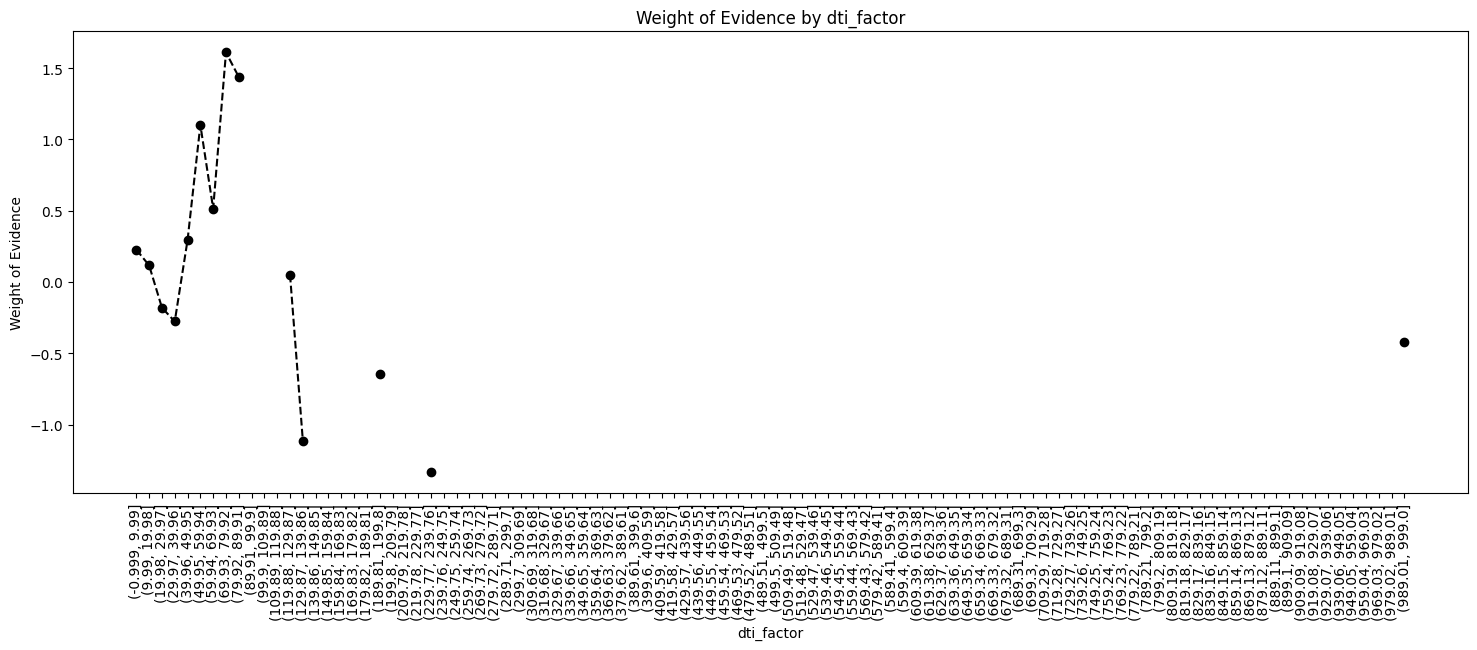

In [359]:
plot_woe(df_temp, 90)

In [360]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [361]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_continous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\4167822511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",172,0.895349,0.003394,154.0,18.0,0.003440,0.003047,0.121484,NaN,NaN,0.044038
1,"(0.7, 1.4]",246,0.886179,0.004855,218.0,28.0,0.004870,0.004739,0.027194,0.009170,0.094290,0.044038
2,"(1.4, 2.1]",266,0.879699,0.005249,234.0,32.0,0.005227,0.005416,-0.035512,0.006480,0.062705,0.044038
3,"(2.1, 2.8]",348,0.899425,0.006868,313.0,35.0,0.006992,0.005924,0.165758,0.019726,0.201270,0.044038
4,"(2.8, 3.5]",426,0.903756,0.008407,385.0,41.0,0.008601,0.006940,0.214574,0.004331,0.048816,0.044038
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(31.5, 32.2]",560,0.842857,0.011051,472.0,88.0,0.010544,0.014895,-0.345455,0.021370,0.153183,0.044038
46,"(32.2, 32.9]",513,0.857700,0.010124,440.0,73.0,0.009829,0.012356,-0.228782,0.014843,0.116673,0.044038
47,"(32.9, 33.6]",529,0.869565,0.010440,460.0,69.0,0.010276,0.011679,-0.127977,0.011865,0.100805,0.044038
48,"(33.6, 34.3]",474,0.854430,0.009354,405.0,69.0,0.009047,0.011679,-0.255316,0.015135,0.127339,0.044038


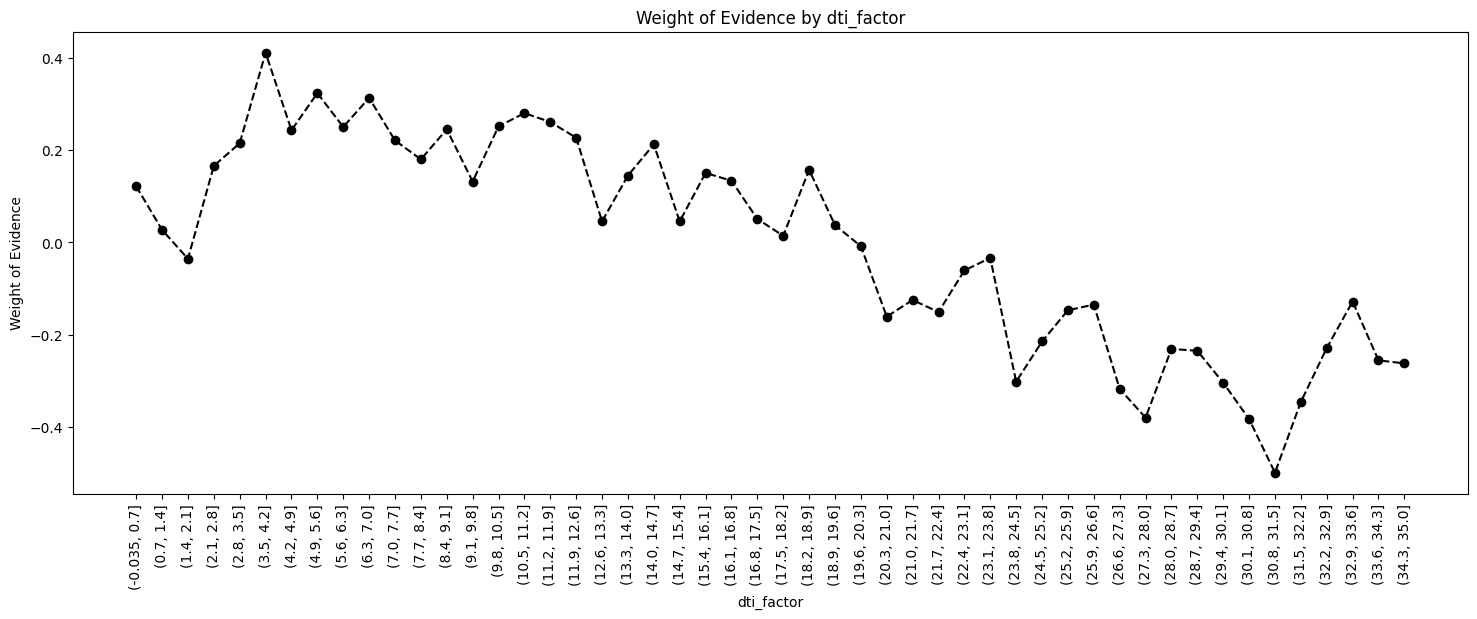

In [362]:
plot_woe(df_temp, 90)

In [363]:
create_dummy_column('dti','dti:<=1.4',value=[1.4],typee='smaller')
create_dummy_column('dti','dti:1.4-3.5',value=[1.4,3.5],typee='range')
create_dummy_column('dti','dti:3.5-7.7',value=[3.5,7.7],typee='range')
create_dummy_column('dti','dti:7.7-10.5',value=[7.7,10.5],typee='range')
create_dummy_column('dti','dti:10.5-16.1',value=[10.5,16.1],typee='range')
create_dummy_column('dti','dti:16.1-20.3',value=[16.1,20.3],typee='range')
create_dummy_column('dti','dti:20.3-21.7',value=[20.3,21.7],typee='range')
create_dummy_column('dti','dti:21.7-22.4',value=[21.7,22.4],typee='range')
create_dummy_column('dti','dti:22.4-35',value=[22.4,35],typee='range')
create_dummy_column('dti','dti:>35',value=[35],typee='bigger')

In [364]:
ref_cat.append('dti:>35')

In [365]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_continous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\2976745101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",32,0.718750,0.003923,23.0,9.0,0.003311,0.007444,-0.810247,NaN,NaN,0.074775
1,"(2.42, 4.84]",13,0.923077,0.001594,12.0,1.0,0.001727,0.000827,0.736390,0.204327,1.546637,0.074775
2,"(4.84, 7.26]",30,0.833333,0.003678,25.0,5.0,0.003599,0.004136,-0.139078,0.089744,0.875469,0.074775
3,"(7.26, 9.68]",27,0.777778,0.003310,21.0,6.0,0.003023,0.004963,-0.495753,0.055556,0.356675,0.074775
4,"(9.68, 12.1]",52,0.730769,0.006376,38.0,14.0,0.005470,0.011580,-0.749988,0.047009,0.254234,0.074775
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(108.9, 111.32]",270,0.892593,0.033104,241.0,29.0,0.034691,0.023987,0.368985,0.043578,0.568076,0.074775
46,"(111.32, 113.74]",163,0.852761,0.019985,139.0,24.0,0.020009,0.019851,0.007904,0.039832,0.361081,0.074775
47,"(113.74, 116.16]",206,0.878641,0.025257,181.0,25.0,0.026054,0.020678,0.231105,0.025880,0.223201,0.074775
48,"(116.16, 118.58]",122,0.877049,0.014958,107.0,15.0,0.015402,0.012407,0.216262,0.001592,0.014843,0.074775


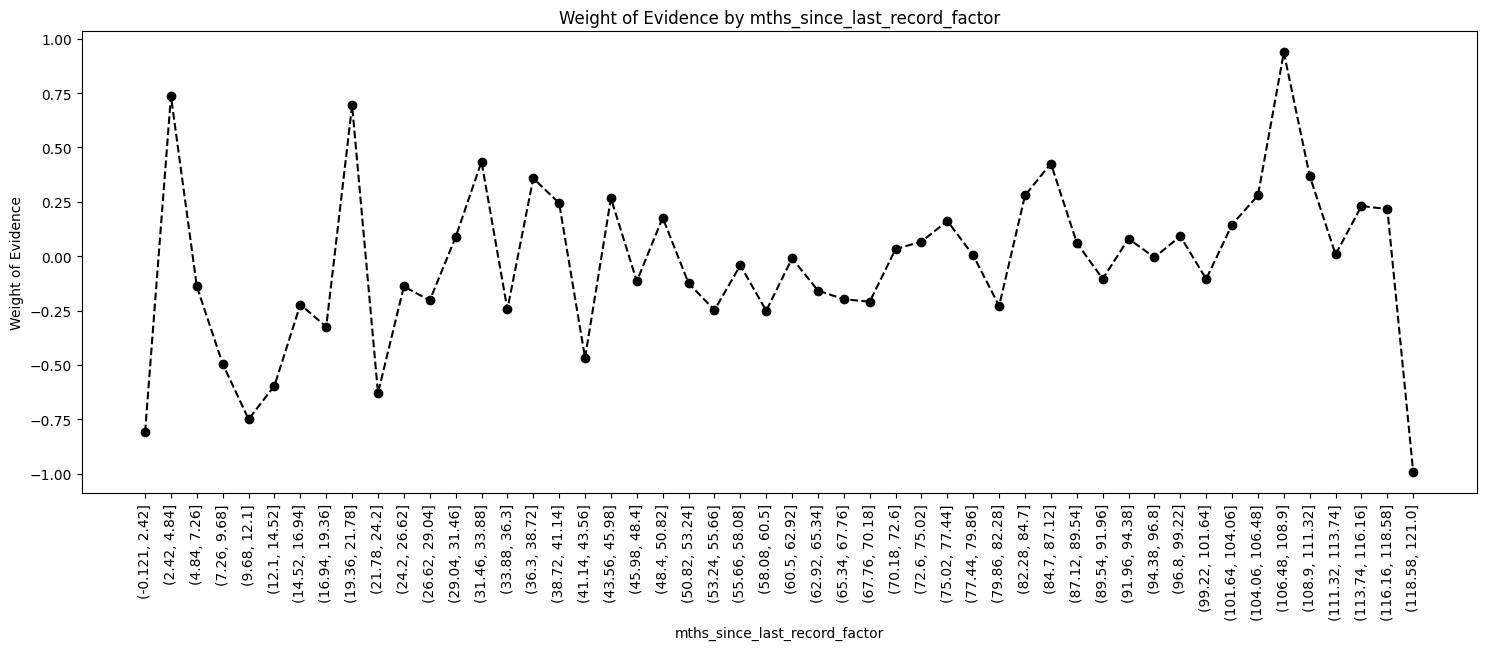

In [366]:
plot_woe(df_temp, 90)

In [367]:
create_dummy_column('mths_since_last_record','mths_since_last_record:Missing',typee='null')
create_dummy_column('mths_since_last_record','mths_since_last_record:0-2',value=[0,2],typee='range')
create_dummy_column('mths_since_last_record','mths_since_last_record:3-20',value=[3,20],typee='range')
create_dummy_column('mths_since_last_record','mths_since_last_record:21-31',value=[20,31],typee='range')
create_dummy_column('mths_since_last_record','mths_since_last_record:32-80',value=[31,80],typee='range')
create_dummy_column('mths_since_last_record','mths_since_last_record:81-86',value=[80,85],typee='range')
create_dummy_column('mths_since_last_record','mths_since_last_record:>=86',value=[86],typee='bigger')

C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where((df[col_name] > value[0]) & (df[col_name] <= value[1]), 1, 0)
C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where((df[col_name] > value[0]) & (df[col_name] <= value[1]), 1, 0)
C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

In [368]:
create_dummy_column('annual_inc','annual_inc:<20K',value=[20000],typee='smaller')
create_dummy_column('annual_inc','annual_inc:20K-30K' ,value=[20000,30000],typee='range')
create_dummy_column('annual_inc','annual_inc:30K-40K' ,value=[30000,40000],typee='range')
create_dummy_column('annual_inc','annual_inc:40K-50K' ,value=[40000,50000],typee='range')
create_dummy_column('annual_inc','annual_inc:50K-60K' ,value=[50000,60000],typee='range')
create_dummy_column('annual_inc','annual_inc:60K-70K' ,value=[60000,70000],typee='range')
create_dummy_column('annual_inc','annual_inc:70K-80K' ,value=[70000,80000],typee='range')
create_dummy_column('annual_inc','annual_inc:80K-90K' ,value=[80000,90000],typee='range')
create_dummy_column('annual_inc','annual_inc:90K-100K',value=[90000,100000],typee='range')
create_dummy_column('annual_inc','annual_inc:100K-120K',value=[100000,120000],typee='range')
create_dummy_column('annual_inc','annual_inc:120K-140K',value=[120000,140000],typee='range')
create_dummy_column('annual_inc','annual_inc:>140K',value=[140000],typee='bigger')

C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where(df[col_name] <= value[0], 1, 0)
C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where((df[col_name] > value[0]) & (df[col_name] <= value[1]), 1, 0)
C:\Users\Amr\AppData\Local\Temp\ipykernel_8748\1438006721.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [369]:
ref_cat.append("term: 60 months")
ref_cat.append("annual_inc:>140K")

In [370]:
# loan_data_inputs_train = df_inputs_prepr
# loan_data_targets_train = df_targets_prepr



In [371]:
loan_data_inputs_test = df_inputs_prepr
loan_data_targets_test = df_targets_prepr

In [372]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
# print(loan_data_inputs_test.shape)
# print(loan_data_targets_test.shape)

(212035, 313)
(212035,)


In [373]:
# loan_data_inputs_train.to_csv("loan_data_inputs_train.csv")
# loan_data_targets_train.to_csv("loan_data_targets_train.csv")
loan_data_inputs_test.to_csv("loan_data_inputs_test.csv")
loan_data_targets_test.to_csv("loan_data_targets_test.csv")

In [280]:
import csv



# open a file in write mode and create a CSV writer object
with open('ref_list.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # write each element of the list as a row in the CSV file
    for elem in ref_cat:
        writer.writerow([elem])
